In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from tqdm import tqdm 
%matplotlib inline

In [2]:
import torch
import torch.nn as nn 
import torch.optim as optim
import torch.nn.functional as F 

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available else "cpu")

In [4]:
X = np.random.rand(100,10)
X = torch.tensor(X, dtype=torch.float32, device = device)
# X = (X - torch.mean(X))/(torch.std(X))
print(X.size())

torch.Size([100, 10])


In [5]:
y = np.random.randint(0,2,size=(100,1))
y = torch.tensor(y, dtype = torch.float32, device = device)
print(y.size())

torch.Size([100, 1])


In [6]:
inp = 10
h1 = 50
h2 = 50
h3 = 50
op = 1 

In [7]:
class ptmodel(nn.Module):
    def __init__(self):
        super(ptmodel, self).__init__()
        self.fc1 = nn.Linear(inp, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, h3)
        self.fc4 = nn.Linear(h3, op)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        return x

In [8]:
model = ptmodel().to(device)

In [9]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

In [10]:
epochs = []
train_loss = []
for i in tqdm(range(1,10001)):
    optimizer.zero_grad()
    ff = model(X)
    loss = criterion(ff, y)
    loss.backward()
    epochs.append(i)
    train_loss.append(loss)
    optimizer.step()

100%|██████████| 10000/10000 [00:33<00:00, 298.60it/s]


In [11]:
label = ""
for ep, l in zip(epochs, train_loss):
    if ep == 1 or ep%1000==0:
        print(f"Epoch {ep}:\ttraining loss:\t{l:0.4f}") 
        label+=f"Epoch {ep}: training loss: {l:0.4f}"+"\n"

Epoch 1:	training loss:	0.6915
Epoch 1000:	training loss:	0.0002
Epoch 2000:	training loss:	0.0000
Epoch 3000:	training loss:	0.0000
Epoch 4000:	training loss:	0.0000
Epoch 5000:	training loss:	0.0000
Epoch 6000:	training loss:	0.0000
Epoch 7000:	training loss:	0.0000
Epoch 8000:	training loss:	0.0000
Epoch 9000:	training loss:	0.0000
Epoch 10000:	training loss:	0.0000


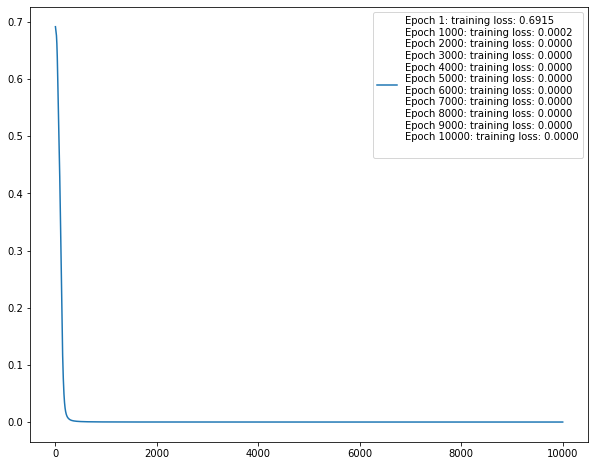

In [12]:
plt.figure(figsize=(10,8))
plt.plot(epochs, train_loss, label=label)
plt.legend()
plt.show()